# XX - Numerical Integration In One Variable<br>*(Ch. 5)*

Integrals come up in many areas of science and mathematics! 

Sometimes we can solve integrals analytically (as in calculus courses), and sometimes we can't. As a general rule, we can always use a computer to do the hard work for us!

## Consider first a definite integral using the *Trapezoidal Rule.*


<img src="images/trapezoidal_rule_small.jpg" alt="drawing" width="400"/>


We have some data points in the form $\left(x_i,f(x_i)\right)$. We "connect the dots" to create trapezoids, then calculate the area of each.

Determining the area of a trapezoid involves some simple geometry (see figures).

<img src="images/trapezoid.jpg" alt="drawing" width="200"/>


We find

\begin{equation*}\large A_{\text{trap}} = \frac12 h\left(p+q\right)\end{equation*}

If we add up the area of each trapezoid, we'll use the leftmost point $x_0$ once and the rightmost point $x_{N-1}$ once, and all interior points twice. Thus if we have a $N$ data points with a step size of $k$, starting at $x=a$ and ending at $x=b$ (so $k=\left(b-a\right)/N$),  we have

\begin{equation*}\large A_{\text{tot}} = h\left[\frac12 \left(f(a) + f(b)\right) + \sum_{k=1}^{N-1} f(a+kh)\right] \end{equation*}


This is straightforward to implement in Python!


The integral of sin(x) from 0 to 2*pi is 9.69e-17.


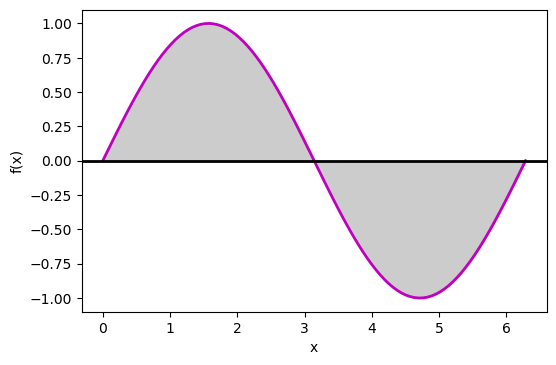

In [3]:
import numpy as np
import matplotlib.pyplot as plt


# Create the data
a,b,N = 0,2*np.pi,100
h = (b-a)/N
xvals = np.linspace(a,b,N)
yvals = [np.sin(x) for x in xvals]

# Determine the integral using the trapezoidal rule
integral = h*(0.5*(yvals[0]+yvals[-1]) + sum(yvals[1:-1]))
print("The integral of sin(x) from 0 to 2*pi is {0:.2e}.".format(integral))

#Make a plot for good measure!
plt.figure(dpi=100)
plt.plot(xvals,yvals,'m-',lw=2)
plt.fill_between(xvals,0,yvals,color='.8') #this is new!
plt.axhline(y=0,lw=2,color='k')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()




<br><br><br><br><br><br><br><br><br><br>

## The Trapezoidal Rule has numerical error $O(h^2)$. We can do better with *Simpson's Rule*.

Simpson's Rule "connects the dots" with a *quadratic* function rather than a *linear* function.  

This leads to numerical error $O(h^4)$.

Simpson's Rule (and a few other methods) are availably with scipy:

In [4]:
from scipy import integrate
import numpy as np

xvals = np.linspace(0,np.pi*2,100)
yvals = [np.sin(x) for x in xvals]

# Note that this method wants the yvals first
integral = integrate.simps(yvals,xvals)

print("The integral of sin(x) from 0 to 2*pi is {0:.2e}".format(integral))

The integral of sin(x) from 0 to 2*pi is -6.64e-17


<br><br><br><br><br><br><br><br><br><br><br><br>

## Now suppose instead of a set of data points $(x,f(x))$, we have an actual function to integrate.

Specifically, suppose we want to determine

\begin{equation*} \Large \int_0^2 (x^4-2x+1)\text{d}x \end{equation*}

This is analytically solvable; the answer is 4.4.

To do this numerically, we could generate some data from this function and apply Simpson's Rule, as above, but if we know the actual functional form, we can do even better!

We'll skip the theory and go straight to implementation using `scipy.integrate.quad` (take Numerical Analysis!):

In [5]:
from scipy import integrate

def f(x):
    return x**4 -2*x + 1

#the arguments are: function, lower bound, upper bound
value, error = integrate.quad(f,0,2)

print("quad() indicates the value is {0:.2e} with absolute error no greater than\
{1:.2e}".format(value,error))

quad() indicates the value is 4.40e+00 with absolute error no greater than5.00e-14


<br><br><br><br><br><br><br><br><br><br><br><br>

## We can specify an infinite limit with `np.inf`

Suppose we want to determine

\begin{equation*} \Large \int_0^\infty e^{-x}\sin(x) \text{d}x \end{equation*}

quad() indicates the value is 5.00e-01 with absolute error no greater than1.49e-08.


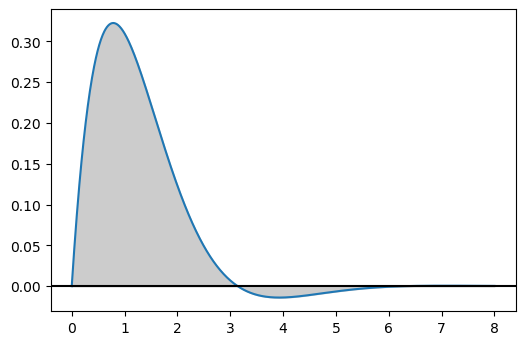

In [7]:
from scipy import integrate
import numpy as np

def f(x):
    return np.exp(-x)*np.sin(x)

#the arguments are: function, lower bound, upper bound
value, error = integrate.quad(f,0,np.inf)

print("quad() indicates the value is {0:.2e} with absolute error no greater than\
{1:.2e}.".format(value,error))

# What does this look like?
xvals = np.linspace(0,8,1000)
yvals = [f(x) for x in xvals]

plt.figure(dpi=100)
plt.plot(xvals,yvals)
plt.axhline(y=0,color='k')
plt.fill_between(xvals,0,yvals,color='.8')
plt.show()


<br><br><br><br><br><br><br><br><br><br><br><br>

## Example: A semicircle of charge

In electrostatics, we often wish to determine the electric field at some position due to some configuration of charge. Consider a semicircular ring with radius $R$ carrying charge per unit length $\lambda$. A small chunk of wire carries a charge $dq = \lambda R \text{d}\theta$ (see figure).

<img src="images/charge_ring.jpg" alt="drawing" width="400"/>

The electric field due to a piece of charge $\text{d}q$ is

\begin{equation*} \large \text{d}E = k \frac{\text{d}q}{R^2} = k \frac{\lambda R \text{d}\theta}{R^2} = k \frac{\lambda \text{d}\theta}{R}\end{equation*}

To consider the net field due to every chunk of charge, we have to add up every contribution. Geometrically we see that the horizontal components of the field will cancel, so the net field points up and has a magnitude given by:

\begin{equation*} \large E_{\text{net}} = k \frac{\lambda}{R} \int_0^\pi sin(\theta) \text{d}\theta  \end{equation*}

**Determine the magnitude of the electric field at the center of a ring of radius $1.5\text{m}$ carrying a charge of $Q=5.0\times 10^{-9} \text{C}$.** 

**Note that $k=8.99\times 10^{9} \text{Nm}^2/\text{C}^2$.**

<br><br><br><br><br><br><br>

In [6]:
from scipy import integrate
import numpy as np

#constants!
k = 8.99E9
R = 1.5
Q = 5.0E-9
L = Q/(np.pi*R)  # lambda is charge/length (1/2 circle!)

def f(x):
    return np.sin(x)

#the arguments are: function, lower bound, upper bound
value, error = integrate.quad(f,0,np.pi)

value *= k*L/R

print("The magnitude of the electric field is {0:.2e} N/C.".format(value))


The magnitude of the electric field is 1.27e+01 N/C.


<br><br><br><br><br><br><br><br><br><br><br><br>

## Example: The anharmonic oscillator

<img src="images/quartic_oscillator_small.jpg" alt="drawing" width="400"/>

In classical mechanics, a particle trapped in a potential well can be thought of as a bead in a frictionless valley, rolling back and forth. Suppose we release the bead from rest at some position $a$ at $t=0$. Then according to energy conservation,

\begin{equation*} \large E = V(a) = \frac12 m\left( \frac{\text{d}x}{\text{d}t}\right)^2 + V(x)  \end{equation*}

This equation can be solved for the period of oscillation, $T$:

\begin{equation*} \large \begin{aligned} \int_0^{T/4}dt &= \sqrt{\frac{m}{2}} \int_0^a  \frac{\text{d}x}{\sqrt{V(a)-V(x)}} \\ 
\large T &= 2\sqrt{2m} \int_0^a  \frac{\text{d}x}{\sqrt{V(a)-V(x)}}  \end{aligned} \end{equation*}

If $V(x) = x^2$, we have the classical *simple harmonic oscillator*. Consider instead the energy well $V(x) = x^4$. 

**For a particle of mass $m=1$, determine $T$ for amplitudes ranging from $a=0$ to $a=2$. Plot your results.**

<br><br><br><br><br><br><br>

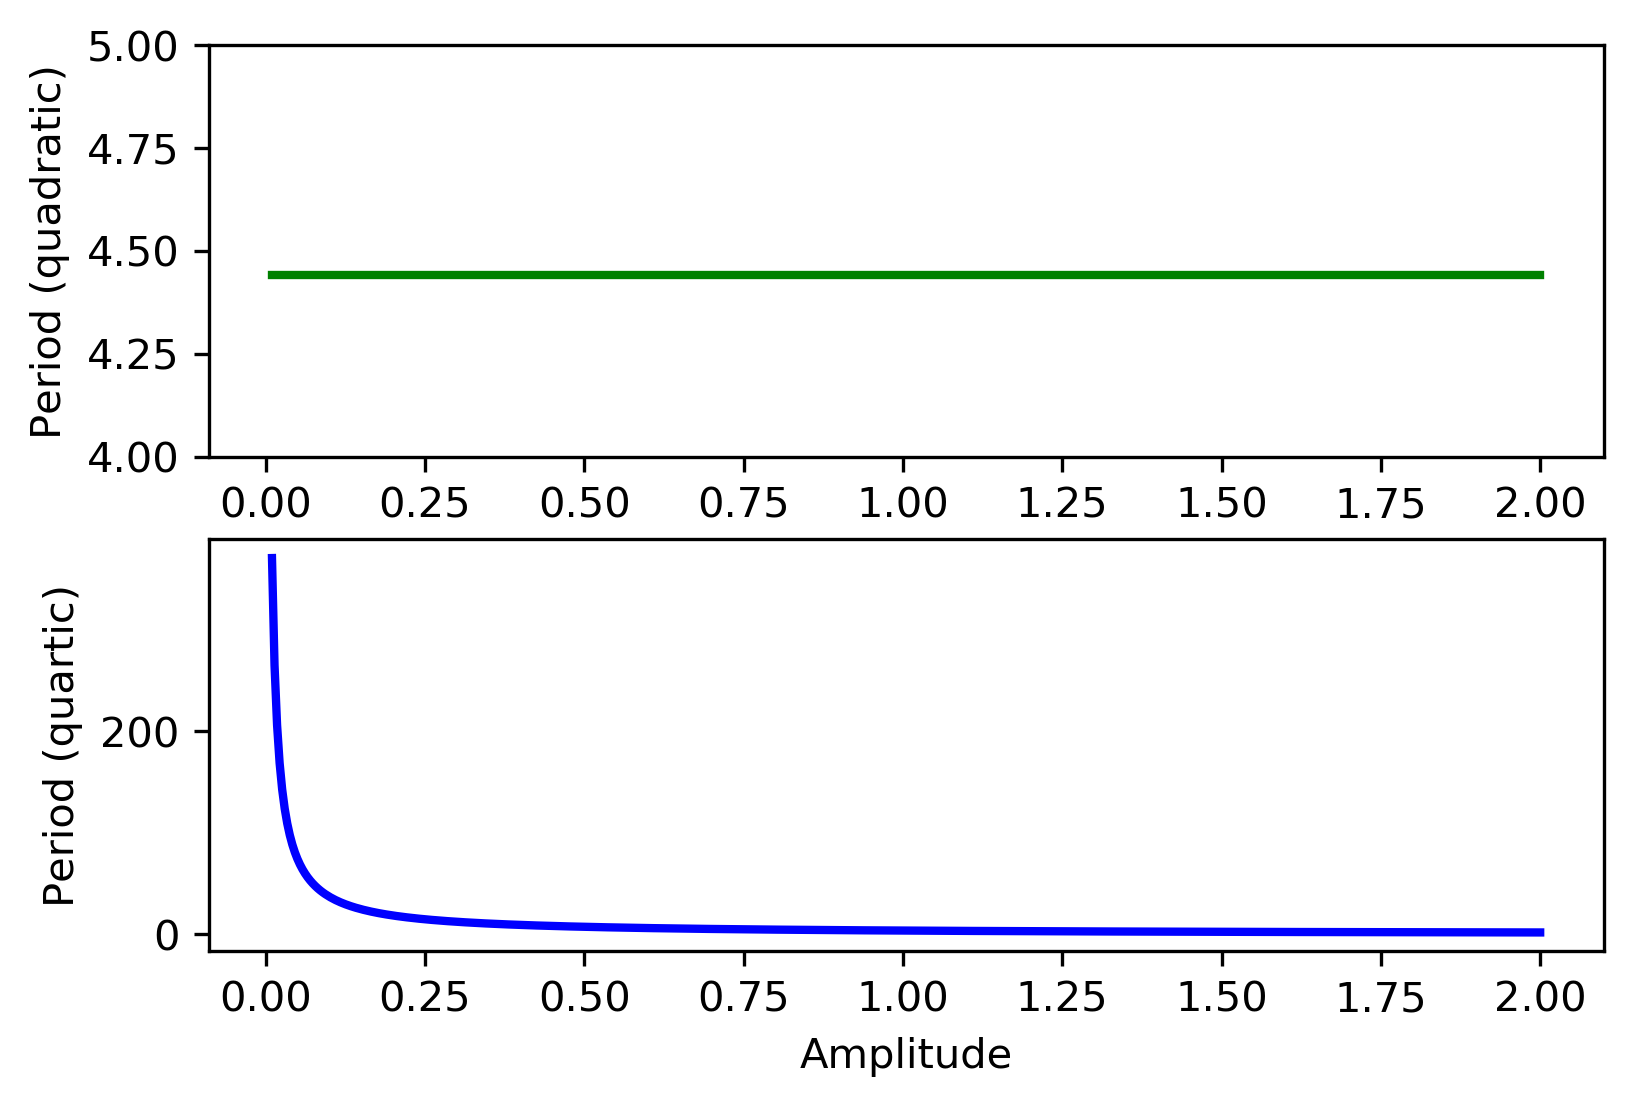

In [2]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

# I'll look at both the x^2 and x^4 potential wells, for comparison
# For simplicity, choosing m so the coefficient is 1
def f2(x):
    return (a**2-x**2)**(-0.5)

def f4(x):
    return (a**4-x**4)**(-0.5)

T2_vals, T4_vals = [],[]
avals = np.linspace(0.01,2,500)  # infinite period at a=0, so omit
for a in avals:
    val, error = integrate.quad(f2,0,a)
    T2_vals.append(val*2*2**0.5)
    
    val, error = integrate.quad(f4,0,a)
    T4_vals.append(val*2*2**0.5)

# Plot our results
plt.figure(dpi=300)
plt.subplot(211)
plt.plot(avals,T2_vals,'g-',lw=2)
plt.ylabel('Period (quadratic)')
plt.ylim(4,5)

plt.subplot(212)
plt.plot(avals,T4_vals,'b-',lw=2)
plt.xlabel('Amplitude')
plt.ylabel('Period (quartic)')
plt.show()

# The period for a SHO is constant, regardless of amplitude.
# For a quartic, a low amplitude results in a very high period...
# ...and a high amplitude results in a very low period!

## Derivatives